In [94]:
import pandas as pd

In [95]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

IOError: File ../main_15min_decomposition_12_daily_weekly_cluster_diff_frac_temp_weekday_hvac_energy_fft.csv does not exist

In [96]:
run all_functions.py


In [93]:
cat ../sensitivity-data/wm_All.json

{"wm": {"All": {"k": 1, "f": ["aggregate_11", "aggregate_10", "bet_500_1000", "daily_usage_1", "aggregate_2", "difference_min_max"], "accuracy": 66.39890569935929}}}

In [53]:
!ls -1 ../sensitivity-data|grep .json

dr_All.json
dr_Monthly+Static.json
dr_Monthly.json
dr_Static.json
dw_All.json
dw_Monthly+Static.json
dw_Monthly.json
dw_Static.json
fridge_All.json
fridge_Monthly+Static.json
fridge_Monthly.json
fridge_Static.json
hvac_All.json
hvac_Monthly+Static.json
hvac_Monthly.json
hvac_Static.json
light_All.json
light_Monthly+Static.json
light_Monthly.json
light_Static.json
wm_All.json
wm_Monthly+Static.json
wm_Monthly.json
wm_Static.json


In [28]:
appliances = ["hvac","dr", "light","fridge","wm","dw"]
out = {}
import json
for appliance in appliances:
    out[appliance]={}
    for feature in ["Monthly","Static", "Monthly+Static","All"]:
        print appliance, feature
        out[appliance][feature]={}
        o = json.load(open("../sensitivity-data/%s_%s.json" %(appliance, feature),'r'))
        f = o[appliance][feature]['f']
        k = o[appliance][feature]['k']
        temp= create_predictions(df, dfc, all_homes, appliance_min, 
                                              national_average, appliance=appliance,
                                                feature=f, NUM_NEIGHBOURS=k,
                                                   train_outlier=True, test_outlier=False, 
                                                outlier_features=None,
                                                outlier_fraction=0.1)
        errors = {}
        if appliance =="hvac":
            start_month, end_month = 5, 11
        else:
            start_month, end_month = 1, 13
        for i in range(start_month, end_month):
            errors[i] = percentage_error(temp[i]["gt"], temp[i]["pred"])
            error_df = pd.DataFrame(errors)
            accur_df = 100-error_df
            accur_df[accur_df<0]=0

        tdf = accur_df
        if appliance =="hvac":
            for home in [624, 1953, 6636, 6836, 7769, 9922]:
                tdf.loc[home, 5]=np.NaN
                tdf.loc[home, 10]=np.NaN

        out[appliance][feature]=tdf.T.mean().mean()
            
            

hvac Monthly
hvac Static
hvac Monthly+Static
hvac All
dr Monthly
dr Static
dr Monthly+Static
dr All
light Monthly
light Static
light Monthly+Static
light All
fridge Monthly
fridge Static
fridge Monthly+Static
fridge All
wm Monthly
wm Static
wm Monthly+Static
wm All
dw Monthly
dw Static
dw Monthly+Static
dw All


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
appliance_name_mapping = {"dr": "Dryer", "wm": "Washing\nmachine",
                          "fridge":"Fridge","light":"Lights",
                          "hvac":"HVAC","dw":"Dish\nwasher"}

In [56]:
sen = pd.DataFrame(out)

In [55]:
# Adding orcale

In [57]:
sen

dr         dw     fridge       hvac      light  \
All             41.500556  46.288463  81.597182  79.283312  53.255072   
Monthly         39.344495  42.587760  77.740660  79.208159  47.066094   
Monthly+Static  41.720212  42.077928  78.442603  79.208159  49.605087   
Static          38.444273  38.623122  75.182587  71.783518  48.235812   

                       wm  
All             66.398906  
Monthly         64.363110  
Monthly+Static  64.504250  
Static          60.045676

In [58]:
sen.loc['Oracle'] = pd.Series({'dr': 64.885914164535222,
 'dw': 61.017474093337341,
 'fridge': 91.888765437104055,
 'hvac': 93.195959529260662,
 'light': 77.810755698772141,
 'wm': 80.183453230991176})

In [60]:
sen = sen.ix[['Static','Monthly','Monthly+Static','All','Oracle']]

In [61]:
sen = sen.rename(columns=appliance_name_mapping).T

In [62]:
sen

Static    Monthly  Monthly+Static        All     Oracle
Dryer             38.444273  39.344495       41.720212  41.500556  64.885914
Dish\nwasher      38.623122  42.587760       42.077928  46.288463  61.017474
Fridge            75.182587  77.740660       78.442603  81.597182  91.888765
HVAC              71.783518  79.208159       79.208159  79.283312  93.195960
Lights            48.235812  47.066094       49.605087  53.255072  77.810756
Washing\nmachine  60.045676  64.363110       64.504250  66.398906  80.183453

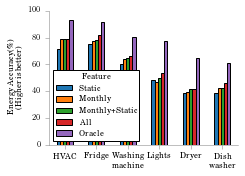

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline
from common_functions import latexify, format_axes
latexify(columns=1, fig_height=2.4)

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)
    
    

sen.ix[['HVAC','Fridge','Washing\nmachine',
                                    'Lights','Dryer','Dish\nwasher']].plot(kind="bar",rot=0, colors=tableau20blind[::2])
format_axes(plt.gca())
plt.ylim((0,100))
plt.ylabel("Energy Accuracy(\%)\n(Higher is better)");
plt.legend(loc=3, title="Feature")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-features.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/sensitivity-features.png",bbox_inches="tight")

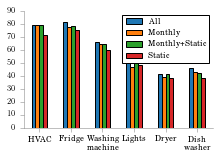